In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train= pd.read_csv("/content/train.csv")
test= pd.read_csv("/content/test.csv")

In [8]:
train.shape

(16119, 371)

In [9]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [10]:
cols= train.columns

In [11]:
list(set([col.split("_")[0] for col in cols]))

['TARGET',
 'saldo',
 'delta',
 'var15',
 'ID',
 'imp',
 'var38',
 'ind',
 'var36',
 'num',
 'var3',
 'var21']

In [12]:
ind_cols = cols[[col.split('_')[0] == 'ind' for col in cols]]
imp_cols = cols[[col.split('_')[0] == 'imp' for col in cols]]
saldo_cols = cols[[col.split('_')[0] == 'saldo' for col in cols]]
delta_cols = cols[[col.split('_')[0] == 'delta' for col in cols]]
num_cols = cols[[col.split('_')[0] == 'num' for col in cols]]
len(ind_cols), len(imp_cols), len(saldo_cols), len(delta_cols), len(num_cols)

(75, 49, 71, 26, 143)

In [10]:
ind_cols

Index(['ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0',
       'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8',
       'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0',
       'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo',
       'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0',
       'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18',
       'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24',
       'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26',
       'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30',
       'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32',
       'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var37_cte',
       'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40',
       'ind_var41_0', 'ind_var4

In [14]:
#'YES' there are special tag in colunms
# 'ind' are 0 or 1

train[ind_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var1_0,8058.0,0.010921,0.103937,0.0,0.0,0.0,0.0,1.0
ind_var1,8058.0,0.004219,0.064824,0.0,0.0,0.0,0.0,1.0
ind_var2_0,8058.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var2,8058.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var5_0,8058.0,0.958923,0.198481,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
ind_var10cte_ult1,8057.0,0.090232,0.286532,0.0,0.0,0.0,0.0,1.0
ind_var9_cte_ult1,8057.0,0.094204,0.292130,0.0,0.0,0.0,0.0,1.0
ind_var9_ult1,8057.0,0.083902,0.277258,0.0,0.0,0.0,0.0,1.0
ind_var43_emit_ult1,8057.0,0.064540,0.245728,0.0,0.0,0.0,0.0,1.0


In [16]:
#'saldo' similar 'imp' are quite big gap between min and max
train[saldo_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
saldo_var1,8058.0,6.176080,148.761994,0.00,0.0,0.0,0.0,7904.22
saldo_var5,8058.0,1014.842982,9789.244014,-508.56,0.0,3.0,90.0,521493.60
saldo_var6,8058.0,1.486299,133.419686,0.00,0.0,0.0,0.0,11976.60
saldo_var8,8058.0,128.594415,2917.457667,-1802.01,0.0,0.0,0.0,240045.00
saldo_var12,8058.0,6386.837468,44774.695386,0.00,0.0,0.0,0.0,1203384.18
...,...,...,...,...,...,...,...,...
saldo_medio_var33_ult3,8057.0,3.452986,186.246319,0.00,0.0,0.0,0.0,11959.17
saldo_medio_var44_hace2,8057.0,18.360495,666.835891,0.00,0.0,0.0,0.0,44990.49
saldo_medio_var44_hace3,8057.0,3.369729,218.669230,0.00,0.0,0.0,0.0,18928.59
saldo_medio_var44_ult1,8057.0,29.525086,909.374303,0.00,0.0,0.0,0.0,47617.08


In [17]:
#'delta' have same max_values
train[delta_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_amort_var18_1y3,8058.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_amort_var34_1y3,8058.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_aport_var13_1y3,8058.0,4.467610e+07,6.669484e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_aport_var17_1y3,8058.0,3.723008e+06,1.929270e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_aport_var33_1y3,8058.0,-3.649139e-04,1.891766e-02,-1.0,0.0,0.0,0.0,0.000000e+00
delta_imp_compra_var44_1y3,8058.0,1.116902e+07,3.340349e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var13_1y3,8058.0,4.964011e+06,2.227591e+08,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var17_1y3,8058.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_reemb_var33_1y3,8058.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
delta_imp_trasp_var17_in_1y3,8058.0,1.241003e+06,1.114003e+08,0.0,0.0,0.0,0.0,1.000000e+10


In [18]:
train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_var1_0,8058.0,0.032762,0.311811,0.0,0.0,0.0,0.0,3.0
num_var1,8058.0,0.012658,0.194471,0.0,0.0,0.0,0.0,3.0
num_var4,8058.0,1.071606,0.893878,0.0,0.0,1.0,1.0,6.0
num_var5_0,8058.0,2.891288,0.635389,0.0,3.0,3.0,3.0,9.0
num_var5,8058.0,1.988831,1.430748,0.0,0.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...
num_venta_var44_ult1,8057.0,0.002234,0.081842,0.0,0.0,0.0,0.0,3.0
num_var45_hace2,8057.0,5.323818,13.960400,0.0,0.0,0.0,3.0,258.0
num_var45_hace3,8057.0,3.937942,10.153459,0.0,0.0,0.0,3.0,213.0
num_var45_ult1,8057.0,4.139754,13.196610,0.0,0.0,0.0,3.0,279.0


In [15]:
train['TARGET'].value_counts()

0.0    7734
1.0     323
Name: TARGET, dtype: int64

In [19]:
train.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    1
saldo_medio_var44_ult1     1
saldo_medio_var44_ult3     1
var38                      1
TARGET                     1
Length: 371, dtype: int64

 *Going Through Each Column*

In [ ]:
train.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                     float64
Length: 371, dtype: object

In [20]:
train.var3.value_counts()

2      7882
8        13
0        13
9        12
5        12
       ... 
107       1
174       1
141       1
191       1
30        1
Name: var3, Length: 62, dtype: int64

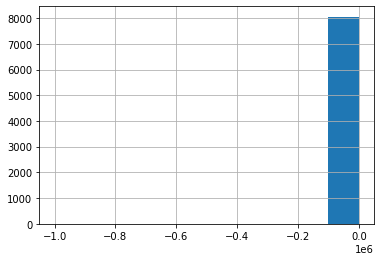

In [21]:
train["var3"].hist()

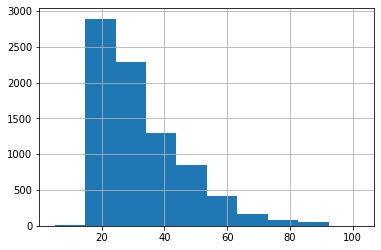

In [23]:
train["var15"].hist()

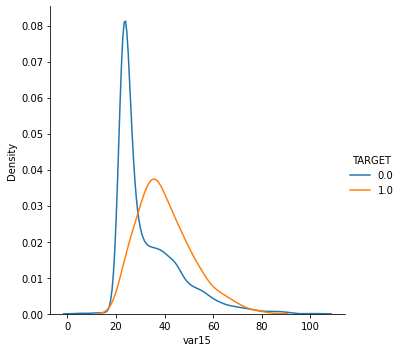

In [25]:
sns.FacetGrid(train, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var15').add_legend();

# most of low_value are satisfied customers

In [28]:
train["var36"].value_counts()

99    3204
3     2292
1     1573
2      933
0       56
Name: var36, dtype: int64

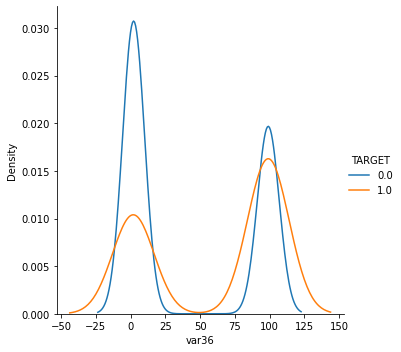

In [29]:
sns.FacetGrid(train, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var36').add_legend()

In [30]:
train["var21"].value_counts()

0.0        7969
900.0        24
1800.0       20
7200.0        8
4500.0        7
6000.0        6
1500.0        4
3600.0        4
9000.0        3
2700.0        3
3000.0        3
2400.0        2
1200.0        2
10500.0       1
3300.0        1
Name: var21, dtype: int64

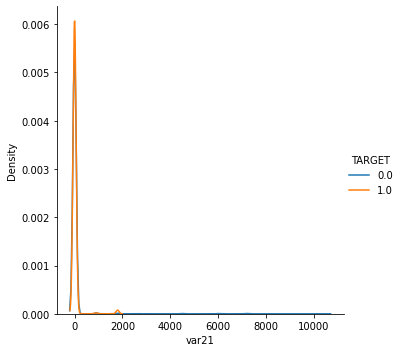

In [31]:
sns.FacetGrid(train, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var21').add_legend()

In [32]:
train["var38"].value_counts()

117310.979016    1599
127141.500000       2
52629.360000        2
128889.420000       2
324294.300000       2
                 ... 
75647.700000        1
148444.170000       1
74448.150000        1
110419.350000       1
94985.910000        1
Name: var38, Length: 6408, dtype: int64

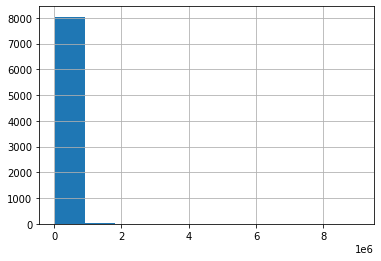

In [34]:
#left-skewed ditribution... need to normalize
train["var38"].hist()

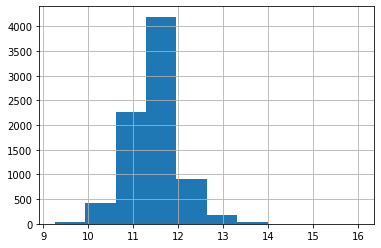

In [36]:
# Applying np.log() to help reshape the skewness to look better
train["var38"] = train["var38"].apply(lambda x : np.log(x))
test["var38"] = test["var38"].apply(lambda x : np.log(x))
train["var38"].hist()

In [63]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [88]:

train.loc[train.var3 == -999999, 'var3'] = 2
test.loc[test.var3 == -999999, 'var3'] = 2

In [89]:
train = train.replace(np.nan, np.mean(train))

**Model Building**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore

In [119]:
y = train["TARGET"]
x = train.drop(['ID','TARGET'], axis=1)



In [120]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

*Logistic Regression*

In [121]:
log_model = LogisticRegression()

In [122]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [123]:
y_pred= log_model.predict(x_test)

In [124]:
log_model.score(x_train,y_train)

0.9595970985079114

In [125]:
from sklearn.metrics import confusion_matrix

In [134]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],columns= [i for i in ["predict1","Predict0"]])
df_cm

,predict1,Predict0
1,21906,14
0,881,5


In [130]:
import seaborn as sns

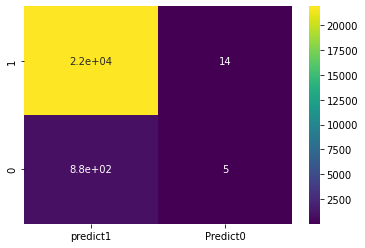

In [141]:
sns.heatmap(df_cm, annot =True,cmap = "viridis")

In [135]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.26      0.01      0.01       886

    accuracy                           0.96     22806
   macro avg       0.61      0.50      0.50     22806
weighted avg       0.93      0.96      0.94     22806



*Random Forest*

In [142]:
rc = RandomForestClassifier(random_state= 86)

In [145]:
rc.fit(x_train, y_train)
rc_pred = rc.predict_proba(x_test)
rc.score(x_train,y_train)

0.9958845416619686

In [147]:
# Looking for  important columns 
rc_fi = pd.DataFrame(rc.feature_importances_, columns = ['cols'], index=x.columns).sort_values('cols',ascending= False)
rc_fi.head(10)

,cols
var38,0.378174
var15,0.180081
saldo_medio_var5_ult3,0.028537
saldo_medio_var5_hace3,0.028251
num_var45_ult3,0.020216
saldo_var30,0.018395
num_var45_hace3,0.017049
saldo_medio_var5_hace2,0.015651
saldo_var42,0.015010
num_var45_hace2,0.014968
